# Cleaning anomalies in time series per region slug



## Load  libraries

In [2]:
# %load first_cell.py
%reload_ext autoreload
%autoreload 2
from pathlib import Path
home = str(Path.home())

import sys
sys.path = sys.path + [f'{home}/.conda/envs/norm_env/lib/python37.zip', 
                       f'{home}/.conda/envs/norm_env/lib/python3.7', 
                       f'{home}/.conda/envs/norm_env/lib/python3.7/lib-dynload', 
                       f'{home}/.conda/envs/norm_env/lib/python3.7/site-packages']
sys.prefix = '/home/soniame/.conda/envs/norm_env'

from paths import RAW_PATH, TREAT_PATH, OUTPUT_PATH, FIGURES_PATH

### Testing

#### Run single

In [3]:
from src.runners.clean import _run_single 

../src/utils.py:158: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.


2021-03-26 14:04:55.642 | INFO     | src.runners.clean:_run_single:692 - ... here we go mexicocity...

2021-03-26 14:04:55.643 | DEBUG    | src.runners.clean:_reading_data:604 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('mexicocity')
        
2021-03-26 14:04:58.839 | DEBUG    | src.runners.clean:_run_step:632 - ... step start ...
2021-03-26 14:04:58.840 | INFO     | src.runners.clean:_run_step:633 - Target variable: observed 

2021-03-26 14:04:58.840 | DEBUG    | src.runners.clean:_find_anomalies:161 - 
... finding outliers ...
2021-03-26 14:04:58.842 | DEBUG    | src.runners.clean:_validate_series:56 - ... validating observed...

../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation

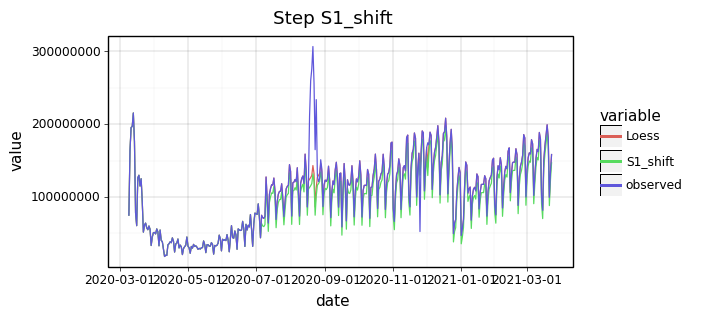

2021-03-26 14:05:00.291 | DEBUG    | src.runners.clean:_run_step:678 - ... step done ...
2021-03-26 14:05:00.297 | DEBUG    | src.runners.clean:_run_step:632 - ... step start ...
2021-03-26 14:05:00.297 | INFO     | src.runners.clean:_run_step:633 - Target variable: S1_shift 

2021-03-26 14:05:00.298 | DEBUG    | src.runners.clean:_find_anomalies:161 - 
... finding outliers ...
2021-03-26 14:05:00.299 | DEBUG    | src.runners.clean:_validate_series:56 - ... validating S1_shift...

../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

<ggplot: (8770645109537)>


2021-03-26 14:05:01.052 | DEBUG    | src.runners.clean:_run_shift_grid:342 - Total combinations: 25
2021-03-26 14:05:01.338 | DEBUG    | src.runners.clean:_initial_shift_date:419 - Shift found at 2020-07-08 00:00:00
2021-03-26 14:05:01.341 | DEBUG    | src.runners.clean:_shift_ts:442 - 

2021-03-26 14:05:01.342 | DEBUG    | src.runners.clean:_shift_ts:443 - Center point: -21477724.69387754
../src/runners/clean.py:447: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:450: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


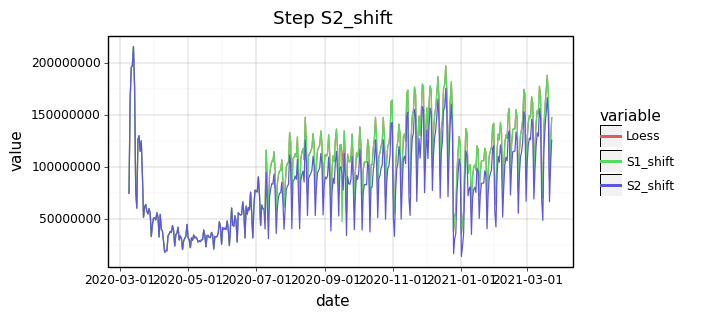

2021-03-26 14:05:01.759 | DEBUG    | src.runners.clean:_run_step:678 - ... step done ...


<ggplot: (8770644174025)>


2021-03-26 14:05:02.561 | DEBUG    | src.runners.clean:_write_missing:611 - ... writing anomalies file ...


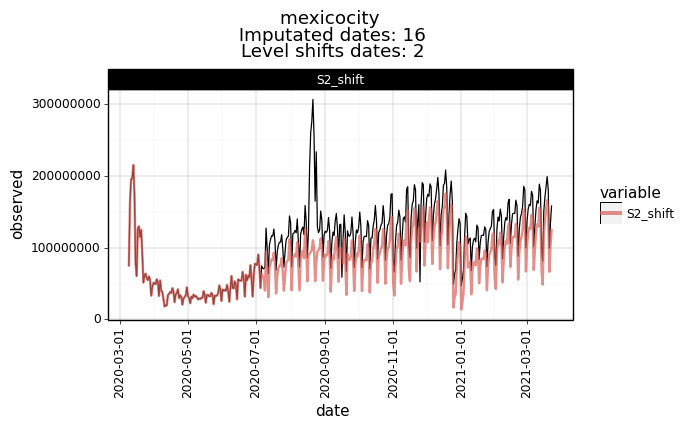

<ggplot: (8770645374801)>


/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_mexicocity.pdf
2021-03-26 14:05:04.345 | INFO     | src.runners.clean:_run_single:765 - ... mexicocity done ...



In [5]:
daily, weekly = _run_single(region_slug='mexicocity', 
                            anomaly_vote_minimun_s1=1, 
                            anomaly_vote_minimun_s2=1, 
                            print_report = False, 
                            print_plot = True)

In [8]:
import plotnine as p9
p9.theme_set(p9.theme_linedraw()) # default theme

../src/utils.py:158: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.


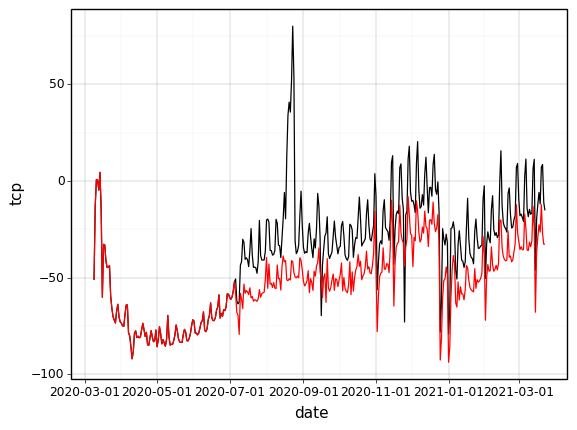

<ggplot: (8770633655389)>

In [9]:
daily.head(3)
(p9.ggplot(daily, p9.aes(x = 'date', y='tcp')) 
 + p9.geom_line() 
 + p9.geom_line(p9.aes( y='tcp_clean'), color = 'red'))

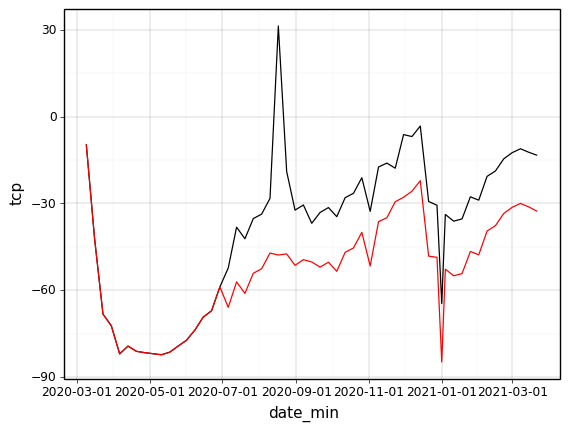

<ggplot: (8770633651653)>

In [10]:
weekly.head(3)
(p9.ggplot(weekly, p9.aes(x = 'date_min', y='tcp')) 
 + p9.geom_line() 
 + p9.geom_line(p9.aes( y='tcp_clean'), color = 'red'))

#### Run by batch

In [13]:
from src.runners.clean import _run_batch 

In [14]:
_run_batch(athena_path = "/home/soniame/shared/spd-sdv-omitnik-waze/corona")

2021-03-26 14:08:34.568 | INFO     | src.runners.clean:_run_batch:777 - Total regions process108
2021-03-26 14:08:34.569 | INFO     | src.runners.clean:_run_single:691 - ... here we go aguascalientes...

2021-03-26 14:08:34.570 | DEBUG    | src.runners.clean:_reading_data:603 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('aguascalientes')
        


aguascalientes


2021-03-26 14:08:37.141 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:08:37.142 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:08:37.142 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:08:37.143 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:08:37.246 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

arequipa


2021-03-26 14:08:42.757 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:08:42.757 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:08:42.759 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:08:42.761 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:08:42.864 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

barranquilla


2021-03-26 14:08:49.156 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:08:49.156 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:08:49.157 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:08:49.159 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:08:49.261 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

belem


2021-03-26 14:08:55.720 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:08:55.721 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:08:55.721 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:08:55.724 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:08:55.827 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

belohorizonte


2021-03-26 14:09:02.209 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:09:02.209 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:09:02.210 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:09:02.212 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:09:02.317 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

bogota


2021-03-26 14:09:08.649 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:09:08.650 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:09:08.652 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:09:08.652 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:09:08.753 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

br_states_acre


2021-03-26 14:09:14.912 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:09:14.913 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:09:14.915 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:09:14.917 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:09:15.019 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

br_states_alagoas


2021-03-26 14:09:21.370 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:09:21.371 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:09:21.371 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:09:21.374 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:09:21.477 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

br_states_amapa


2021-03-26 14:09:26.606 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:09:26.607 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:09:26.609 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:09:26.610 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:09:26.712 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

br_states_amazonas


2021-03-26 14:09:33.274 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:09:33.274 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:09:33.275 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:09:33.277 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:09:33.381 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

br_states_bahia


2021-03-26 14:09:38.749 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:09:38.750 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:09:38.753 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:09:38.754 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:09:38.858 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

br_states_ceara


2021-03-26 14:09:45.094 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:09:45.095 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:09:45.097 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:09:45.098 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:09:45.204 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

br_states_distrito_federal


2021-03-26 14:09:50.592 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:09:50.593 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:09:50.595 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:09:50.596 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:09:50.698 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

br_states_espirito_santo


2021-03-26 14:09:56.996 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:09:56.997 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:09:56.999 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:09:57.000 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:09:57.103 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

br_states_goias


2021-03-26 14:10:03.294 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:10:03.295 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:10:03.296 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:10:03.297 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:10:03.403 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

br_states_maranhao


2021-03-26 14:10:10.121 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:10:10.122 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:10:10.124 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:10:10.125 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:10:10.230 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

br_states_mato_grosso


2021-03-26 14:10:16.509 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:10:16.510 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:10:16.511 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:10:16.513 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:10:16.618 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

br_states_mato_grosso_do_sul


2021-03-26 14:10:24.166 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:10:24.167 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:10:24.170 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:10:24.171 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:10:24.275 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

br_states_minas_gerais


2021-03-26 14:10:30.980 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:10:30.981 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:10:30.982 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:10:30.984 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:10:31.087 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

br_states_para


2021-03-26 14:10:37.630 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:10:37.631 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:10:37.631 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:10:37.633 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:10:37.737 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

br_states_paraiba


2021-03-26 14:10:42.988 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:10:42.989 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:10:42.989 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:10:42.991 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:10:43.094 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

br_states_parana


2021-03-26 14:10:48.326 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:10:48.327 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:10:48.329 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:10:48.330 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:10:48.435 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

br_states_pernambuco


2021-03-26 14:10:54.919 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:10:54.920 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:10:54.921 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:10:54.921 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:10:55.025 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

br_states_piaui


2021-03-26 14:11:00.490 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:11:00.491 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:11:00.491 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:11:00.493 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:11:00.601 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

br_states_rio_de_janeiro


2021-03-26 14:11:06.240 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:11:06.240 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:11:06.242 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:11:06.244 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:11:06.348 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

br_states_rio_grande_do_norte


2021-03-26 14:11:12.496 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:11:12.497 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:11:12.498 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:11:12.500 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:11:12.602 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

br_states_rio_grande_do_sul


2021-03-26 14:11:20.472 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:11:20.473 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:11:20.473 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:11:20.475 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:11:20.578 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

br_states_rondonia


2021-03-26 14:11:26.912 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:11:26.913 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:11:26.914 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:11:26.918 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:11:27.022 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

br_states_roraima


2021-03-26 14:11:33.199 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:11:33.199 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:11:33.202 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:11:33.203 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:11:33.307 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

br_states_santa_catarina


2021-03-26 14:11:38.732 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:11:38.732 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:11:38.733 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:11:38.735 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:11:38.839 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

br_states_sao_paulo


2021-03-26 14:11:46.328 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:11:46.329 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:11:46.329 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:11:46.331 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:11:46.435 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

br_states_sergipe


2021-03-26 14:11:52.721 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:11:52.722 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:11:52.722 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:11:52.724 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:11:52.828 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

br_states_tocantins


2021-03-26 14:11:58.044 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:11:58.045 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:11:58.048 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:11:58.048 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:11:58.157 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

brasilia


2021-03-26 14:12:04.662 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:12:04.663 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:12:04.663 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:12:04.665 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:12:04.769 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

bucaramanga


2021-03-26 14:12:11.473 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:12:11.473 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:12:11.474 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:12:11.475 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:12:11.582 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

buenosaires


2021-03-26 14:12:18.342 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:12:18.343 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:12:18.343 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:12:18.345 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:12:18.447 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

cali


2021-03-26 14:12:25.746 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:12:25.746 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:12:25.747 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:12:25.749 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:12:25.854 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

campinas


2021-03-26 14:12:32.585 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:12:32.585 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:12:32.587 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:12:32.589 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:12:32.697 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

cartagena


2021-03-26 14:12:40.127 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:12:40.127 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:12:40.128 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:12:40.130 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:12:40.234 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

cordoba


2021-03-26 14:12:46.714 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:12:46.714 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:12:46.715 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:12:46.717 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-03-26 14:12:46.745 | DEBUG    | src.runners.clean:_outlier_seasonal_ad:101 - !! No Seasonal !!
../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

country_argentina


2021-03-26 14:12:53.436 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:12:53.437 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:12:53.440 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:12:53.440 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-03-26 14:12:53.468 | DEBUG    | src.runners.clean:_outlier_seasonal_ad:101 - !! No Seasonal !!
../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

country_barbados


2021-03-26 14:12:59.628 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:12:59.629 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:12:59.631 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:12:59.632 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:12:59.739 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

country_brazil


2021-03-26 14:13:06.702 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:13:06.703 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:13:06.705 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:13:06.706 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:13:06.810 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

country_chile


2021-03-26 14:13:13.811 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:13:13.811 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:13:13.812 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:13:13.814 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:13:13.918 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

country_colombia


2021-03-26 14:13:20.218 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:13:20.219 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:13:20.221 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:13:20.222 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:13:20.326 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

country_costa_rica


2021-03-26 14:13:26.792 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:13:26.792 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:13:26.795 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:13:26.796 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:13:26.900 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

country_dominican_republic


2021-03-26 14:13:32.100 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:13:32.101 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:13:32.101 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:13:32.104 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:13:32.207 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

country_ecuador


2021-03-26 14:13:38.684 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:13:38.685 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:13:38.685 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:13:38.687 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:13:38.791 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

country_el_salvador


2021-03-26 14:13:44.065 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:13:44.066 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:13:44.067 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:13:44.067 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:13:44.171 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

country_guatemala


2021-03-26 14:13:49.482 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:13:49.482 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:13:49.483 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:13:49.483 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:13:49.588 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

country_honduras


2021-03-26 14:13:55.952 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:13:55.952 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:13:55.953 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:13:55.954 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:13:56.060 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

country_jamaica


2021-03-26 14:14:01.204 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:14:01.205 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:14:01.207 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:14:01.208 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:14:01.314 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

country_mexico


2021-03-26 14:14:07.841 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:14:07.842 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:14:07.843 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:14:07.845 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:14:07.951 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

country_nicaragua


2021-03-26 14:14:14.161 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:14:14.162 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:14:14.164 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:14:14.165 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:14:14.270 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

country_panama


2021-03-26 14:14:20.878 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:14:20.879 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:14:20.880 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:14:20.882 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:14:20.987 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

country_paraguay


2021-03-26 14:14:26.432 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:14:26.433 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:14:26.435 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:14:26.437 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:14:26.539 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

country_peru


2021-03-26 14:14:32.395 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:14:32.395 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:14:32.398 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:14:32.399 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:14:32.502 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

country_trinidad_and_tobago


2021-03-26 14:14:37.754 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:14:37.754 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:14:37.755 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:14:37.755 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:14:37.861 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

country_uruguay


2021-03-26 14:14:45.085 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:14:45.086 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:14:45.088 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:14:45.090 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-03-26 14:14:45.118 | DEBUG    | src.runners.clean:_outlier_seasonal_ad:101 - !! No Seasonal !!
../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

cucuta


2021-03-26 14:14:51.480 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:14:51.481 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:14:51.483 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:14:51.485 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-03-26 14:14:51.512 | DEBUG    | src.runners.clean:_outlier_seasonal_ad:101 - !! No Seasonal !!
../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

cuenca


2021-03-26 14:14:57.081 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:14:57.081 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:14:57.082 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:14:57.084 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:14:57.188 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

curitiba


2021-03-26 14:15:03.452 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:15:03.453 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:15:03.456 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:15:03.456 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:15:03.561 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

fortaleza


2021-03-26 14:15:10.021 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:15:10.022 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:15:10.023 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:15:10.024 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:15:10.139 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

goiania


2021-03-26 14:15:16.948 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:15:16.949 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:15:16.949 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:15:16.950 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:15:17.055 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

guadalajara


2021-03-26 14:15:22.744 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:15:22.745 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:15:22.746 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:15:22.750 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:15:22.852 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

guatemala


2021-03-26 14:15:29.624 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:15:29.624 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:15:29.625 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:15:29.627 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:15:29.731 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

guayaquil


2021-03-26 14:15:36.058 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:15:36.059 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:15:36.061 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:15:36.062 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:15:36.167 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

joaopessoa


2021-03-26 14:15:44.903 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:15:44.904 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:15:44.904 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:15:44.906 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:15:45.010 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

kingston


2021-03-26 14:15:51.191 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:15:51.192 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:15:51.198 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:15:51.200 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:15:51.307 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

leon


2021-03-26 14:15:58.181 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:15:58.182 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:15:58.184 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:15:58.185 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:15:58.291 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

lima


2021-03-26 14:16:03.855 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:16:03.856 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:16:03.857 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:16:03.859 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:16:03.963 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

maceio


2021-03-26 14:16:10.255 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:16:10.256 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:16:10.258 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:16:10.259 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:16:10.362 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

managua


2021-03-26 14:16:16.961 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:16:16.962 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:16:16.964 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:16:16.966 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:16:17.070 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

manaus


2021-03-26 14:16:23.357 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:16:23.357 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:16:23.358 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:16:23.360 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:16:23.466 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

medellin


2021-03-26 14:16:29.046 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:16:29.047 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:16:29.047 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:16:29.049 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:16:29.154 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

merida


2021-03-26 14:16:35.445 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:16:35.446 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:16:35.447 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:16:35.449 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:16:35.552 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

mexicocity


2021-03-26 14:16:42.380 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:16:42.381 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:16:42.382 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:16:42.383 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:16:42.488 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

monterrey


2021-03-26 14:16:47.803 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:16:47.804 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:16:47.805 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:16:47.805 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:16:47.910 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

montevideo


2021-03-26 14:16:54.289 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:16:54.290 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:16:54.290 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:16:54.292 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-03-26 14:16:54.321 | DEBUG    | src.runners.clean:_outlier_seasonal_ad:101 - !! No Seasonal !!
../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

natal


2021-03-26 14:17:01.365 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:17:01.365 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:17:01.366 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:17:01.368 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:17:01.477 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

panamacity


2021-03-26 14:17:06.820 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:17:06.821 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:17:06.821 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:17:06.823 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:17:06.927 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

pereira


2021-03-26 14:17:12.088 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:17:12.089 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:17:12.089 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:17:12.091 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:17:12.195 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

porto_alergre


2021-03-26 14:17:19.465 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:17:19.466 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:17:19.467 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:17:19.468 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:17:19.573 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

pueble


2021-03-26 14:17:25.067 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:17:25.068 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:17:25.068 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:17:25.070 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:17:25.174 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

queretaro


2021-03-26 14:17:30.779 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:17:30.780 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:17:30.781 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:17:30.782 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:17:30.888 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

quito


2021-03-26 14:17:36.194 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:17:36.195 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:17:36.196 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:17:36.198 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:17:36.302 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

recife


2021-03-26 14:17:42.731 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:17:42.732 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:17:42.733 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:17:42.735 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:17:42.840 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

riodejaneiro


2021-03-26 14:17:49.659 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:17:49.660 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:17:49.660 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:17:49.662 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:17:49.767 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

rosario


2021-03-26 14:17:55.027 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:17:55.028 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:17:55.029 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:17:55.031 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:17:55.133 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

salvador


2021-03-26 14:18:00.570 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:18:00.571 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:18:00.571 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:18:00.573 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:18:00.678 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

sanjose


2021-03-26 14:18:06.948 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:18:06.949 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:18:06.951 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:18:06.953 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:18:07.056 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

sanluispotosi


2021-03-26 14:18:12.318 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:18:12.319 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:18:12.319 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:18:12.321 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:18:12.425 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

sansalvador


2021-03-26 14:18:18.860 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:18:18.860 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:18:18.863 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:18:18.864 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:18:18.966 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

santacruzdelasierra


2021-03-26 14:18:25.433 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:18:25.434 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:18:25.436 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:18:25.438 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:18:25.542 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

santamarta


2021-03-26 14:18:32.530 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:18:32.531 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:18:32.533 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:18:32.534 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:18:32.637 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

santiago


2021-03-26 14:18:39.174 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:18:39.174 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:18:39.175 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:18:39.177 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:18:39.280 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

santiagocaballeros


2021-03-26 14:18:45.589 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:18:45.589 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:18:45.591 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:18:45.593 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:18:45.698 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

2021-03-26 14:18:48.165 | DEBUG    | src.runners.clean:_write_missing:610 - ... writing anomalies file ...
/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_santiagocaballeros.pdf
2021-03-26 14:18:49.475 | INFO     | src.runners.clean:_run_single:764 - ... santiagocaballeros done ...

2021-03-26 14:18:49.477 | INFO     | src.runners.clean:_run_single:691 - ... here we go santodomingo...

2021-03-26 14:18:49.477 | DEBUG    | src.runners.clean:_reading_data:603 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('santodomingo')
        


santodomingo


2021-03-26 14:18:53.077 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:18:53.077 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:18:53.080 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:18:53.081 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:18:53.182 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

santos


2021-03-26 14:18:58.567 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:18:58.568 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:18:58.569 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:18:58.570 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:18:58.674 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

saojosedoscampos


2021-03-26 14:19:04.573 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:19:04.574 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:19:04.576 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:19:04.577 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:19:04.681 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

saoluis


2021-03-26 14:19:11.033 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:19:11.034 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:19:11.035 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:19:11.036 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:19:11.139 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

saopaulo


2021-03-26 14:19:18.142 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:19:18.143 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:19:18.143 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:19:18.145 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:19:18.249 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

sorocaba


2021-03-26 14:19:24.558 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:19:24.559 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:19:24.561 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:19:24.562 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:19:24.666 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

tegucigalpa


2021-03-26 14:19:32.130 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:19:32.131 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:19:32.133 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:19:32.134 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:19:32.238 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

teresina


2021-03-26 14:19:38.507 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:19:38.508 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:19:38.509 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:19:38.511 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:19:38.614 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

toluca


2021-03-26 14:19:45.005 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:19:45.006 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:19:45.008 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:19:45.009 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:19:45.111 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

torreon


2021-03-26 14:19:51.518 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:19:51.519 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:19:51.520 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:19:51.522 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:19:51.626 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

vitoria


2021-03-26 14:19:58.876 | DEBUG    | src.runners.clean:_run_step:631 - ... step start ...
2021-03-26 14:19:58.877 | INFO     | src.runners.clean:_run_step:632 - Target variable: observed 

2021-03-26 14:19:58.877 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-03-26 14:19:58.878 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-03-26 14:19:58.990 | DEBUG    | src.runners.clean:_find_anomalies:171 - Number

In [ ]:
df = pd.read_csv("/home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/daily/daily_daily_index.csv")
head(df)

In [ ]:
#plt.scatter(df.tcp, df.tcp_clean)
#df[['date', 'region_slug', 'tcp_clean']] 

In [ ]:
df.head()
df.describe()

In [ ]:
df.region_slug.unique()

In [ ]:
(df
 >> group_by('region_slug')
 >> summarize(min_tcp = _.tcp_clean.abs().min(),
              max_tcp = _.tcp_clean.abs().max(), 
              min_baseline = _.expected_2020.abs().min()/1e6,
              max_baseline = _.expected_2020.abs().max()/1e6,
              min_observed = _.observed.abs().min()/1e6,
              max_observed = _.observed.abs().max()/1e6,
              min_cleaned = _.S2_shift.abs().min()/1e6,
              max_cleaned = _.S2_shift.abs().max()/1e6
              )
 >> arrange(_.max_tcp)
).tail(15)

#### Step run

In [ ]:
df_cty = _load_data()

In [ ]:
df_run_1 = _run_step(df_run = df_cty[['date', 'S1_shift']].sort_values(by=['date']),
                         anomaly_vote_minimun = 1, 
                         c_param=_c_param(region_slug),
                         target_column_name = 'S1_shift',
                         output_column_name = 'S2_shift',
                         print_report = False, 
                         print_plot = True)

In [ ]:
df_run_1.head()

In [ ]:
df_run_2 = _run_step(df_run = df_run_1[['date', 'S1_shift']].sort_values(by=['date']),
                         anomaly_vote_minimun = 1, 
                         c_param=_c_param(region_slug),
                         target_column_name = 'S1_shift',
                         output_column_name = 'S2_shift',
                         print_report = False, 
                         print_plot = True)

In [ ]:
qry = """
select 
    *
from spd_sdv_waze_corona.prod_daily_weekly_index
limit 10
"""
df = pd.read_sql_query(qry, conn)

In [ ]:
df.columns #sort_values('week_number')

In [17]:
import pandas as pd
metadata = pd.read_csv("http://tiny.cc/idb-traffic-metadata")

In [23]:
print(len(metadata.region_slug))
print(metadata.region_slug.unique())

metadata.head()

139
['country_guatemala' 'barranquilla' 'buenosaires' 'caracas'
 'br_states_maranhao' 'maracay' 'country_dominican_republic' 'saopaulo'
 'manaus' 'br_states_minas_gerais' 'montevideo' 'merida' 'ciudad_guayana'
 'br_states_amazonas' 'lapaz' 'country_peru' 'sanpedrosula'
 'country_argentina' 'br_states_rio_de_janeiro' 'cordoba'
 'country_el_salvador' 'bucaramanga' 'tijuana' 'medellin'
 'br_states_mato_grosso' 'maceio' 'br_states_pernambuco' 'guayaquil'
 'br_states_paraiba' 'country_nicaragua' 'santodomingo' 'panamacity'
 'sanfernado' 'arequipa' 'country_uruguay' 'guatemala' 'natal'
 'sanluispotosi' 'georgetown' 'br_states_santa_catarina' 'santamarta'
 'sansalvador' 'juarez' 'br_states_para' 'salvador' 'br_states_alagoas'
 'br_states_espirito_santo' 'tegucigalpa' 'country_costa_rica'
 'br_states_bahia' 'bridgetown' 'riodejaneiro' 'cucuta' 'br_states_amapa'
 'toluca' 'bogota' 'managua' 'country_honduras' 'queretaro'
 'br_states_piaui' 'leon' 'country_paraguay' 'country_guyana'
 'country_ja

,country_name,country_iso,region_slug,region_name,region_type,population,timezone,region_shapefile_wkt,osm_length,daily_coef_var,...,daily_coef_var_weekday,weekend_osm_ratio,weekday_osm_ratio,daily_approved,weekly_approved,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Guatemala,GT,country_guatemala,Guatemala,country,17915567.0,America/Guatemala,MULTIPOLYGON (((-92.2393264773401 14.541251788...,5.664239e+07,0.257001,...,0.253105,0.958859,1.153470,True,True,NaN,NaN,NaN,NaN,NaN
1,Colombia,CO,barranquilla,Barranquilla,city,1931750.0,America/Bogota,POLYGON ((-74.83374991971161 11.04958488300598...,2.609151e+06,0.316392,...,0.346008,3.327034,4.944916,True,True,NaN,NaN,NaN,NaN,NaN
2,Argentina,AR,buenosaires,Buenos Aires,city,14338718.0,America/Argentina/Buenos_Aires,POLYGON ((-58.75041764050466 -34.3670848864218...,3.033681e+07,0.326066,...,0.423715,1.914411,2.969939,True,True,NaN,NaN,NaN,NaN,NaN
3,Venezuela,VE,caracas,Caracas,city,2408266.0,America/Caracas,POLYGON ((-67.00833333335606 10.39999999997973...,3.187649e+06,0.758516,...,1.737158,0.571506,1.639975,False,False,NaN,NaN,NaN,NaN,NaN
4,Brasil,BR,br_states_maranhao,Maranhao,state,NaN,NaN,POLYGON ((-45.84073319904228 -1.04548473090940...,7.803499e+07,0.355675,...,0.421830,0.376916,0.475001,True,True,NaN,NaN,NaN,NaN,NaN


In [31]:
metadata[metadata.region_slug == 'mexicocity'].region_shapefile_wkt.to_list()

['POLYGON ((-99.22541498771096 19.79958548078565, -99.19208165656235 19.79958548078565, -99.17541499098803 19.77458547907771, -99.15041499262657 19.77458547907771, -99.15041499262657 19.73291880956447, -99.12541499426511 19.73291880956447, -99.10041499590365 19.70791880785653, -99.06708166475504 19.71625214175918, -99.06708166475504 19.69125214005124, -98.99208166967065 19.70791880785653, -98.96708167130919 19.74125214346712, -98.92541500737342 19.69958547395388, -98.95041500573488 19.69125214005124, -98.95874833852204 19.65791880444065, -98.97541500409635 19.65791880444065, -98.96708167130919 19.63291880273271, -98.94208167294772 19.63291880273271, -98.91708167458627 19.65791880444065, -98.8754150106505 19.649585470538, -98.88374834343765 19.63291880273271, -98.90874834179911 19.63291880273271, -98.88374834343765 19.61625213492741, -98.89208167622481 19.59125213321947, -98.85041501228903 19.54125212980358, -98.85041501228903 19.49958546029035, -98.8754150106505 19.47458545858241, -98.